In [1]:
import networkx as nx
import dwave_networkx as dnx
from dwave.system.samplers import DWaveSampler



In [2]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
sampler.parameters


{'anneal_offsets': ['parameters'],
 'anneal_schedule': ['parameters'],
 'annealing_time': ['parameters'],
 'answer_mode': ['parameters'],
 'auto_scale': ['parameters'],
 'beta': ['parameters'],
 'chains': ['parameters'],
 'flux_biases': ['parameters'],
 'flux_drift_compensation': ['parameters'],
 'h_gain_schedule': ['parameters'],
 'initial_state': ['parameters'],
 'max_answers': ['parameters'],
 'num_reads': ['parameters'],
 'num_spin_reversal_transforms': ['parameters'],
 'postprocess': ['parameters'],
 'programming_thermalization': ['parameters'],
 'readout_thermalization': ['parameters'],
 'reduce_intersample_correlation': ['parameters'],
 'reinitialize_state': ['parameters'],
 'warnings': [],
 'chain_strength': [],
 'chain_break_method': [],
 'chain_break_fraction': [],
 'embedding_parameters': [],
 'return_embedding': []}

In [3]:
from dwave.cloud import Client
client = Client.from_config(token='DEV-35cf376ac0058369124f39e86c2f6923892dbf56')
client.get_solvers()

[StructuredSolver(id='DW_2000Q_6'), UnstructuredSolver(id='hybrid_v1')]

In [4]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_ising({'a': -0.5, 'b': 1.0}, {('a', 'b'): -1})
response.data_vectors['energy']    

array([-1.5])

In [5]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline
#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

def example_inline():
    plt.clf()
    
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())

Z=2
ub= -0.02
lb = 0.04

def objective(x,b):
    return (1/2)*((1/ x[0]**2)+ (1/ x[1]**2)) - Z*(1/ x[0]) - Z*(1/ x[1]) + (1/ math.sqrt(x[0]**2 + x[1]**2)) - (b*(x[0]) + b*(x[1]))


# initial guesses
i= 0.02
#j=1.2
n = 2
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0

n5 = []
n4 = []

# show initial objective
#print('Initial Objective: ' + str(objective(x0, i)))
#For j in np.arange(1.1,1.5, .1):

for i in np.arange(ub,lb, .001):
        
    solution1 = minimize(objective,x0, i, method="Nelder-Mead")
    seed = solution1.x
    
    solution = minimize(objective,seed, i, method="Nelder-Mead")
    x = solution.x
    
    #m= (x[1]-x[0])/x[1]
    
    h1 = (1/2)*(1/ x[0]**2) - (Z/ x[0])
    h2 =(1/2)* (1/ x[1]**2) - (Z/ x[1])
    #J =  (1/ math.sqrt(x[0]**2 + x[1]**2)) 
    J12=  (1/ math.sqrt(x[0]**2 + x[1]**2)) - (i*(x[0]) + i*(x[1]))
    energy = objective(x, i)
    #- (i*(x[0]) - i*(x[1]))
    #print(m)
    Norm = math.sqrt((h1)**2 + (h2)**2 + (J12)**2)
    norm_energy = (energy) / (Norm)
    m1 = h1 / (Norm)
    m2 = h2 / (Norm)
    m3 = J12 / (Norm)
    
    response = sampler.sample_ising({'a': m1, 'b': m2}, {('a', 'b'): m3})
    energydwave= response.data_vectors['energy'] 
    #print(energy)
    
    n5.append(energydwave)
    n4.append(norm_energy)
   
    
    #print(energydwave)
    
    

In [6]:
ub2= -0.02
lb2 = 0.04
k= np.arange(ub2,lb2, .001)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


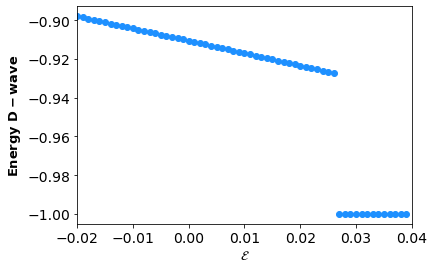

In [7]:
plt.figure(1)
plt.scatter(k, n5, color='dodgerblue')
plt.xlabel(r'$\mathbf{\mathcal{E}}$')
plt.ylabel(r'$\mathbf{Energy ~D-wave}$')
#plt.title(r'$Normalized~ Energy ~D-wave$ vs $\mathcal{E}$')
plt.xlim(ub,lb)
plt.show()

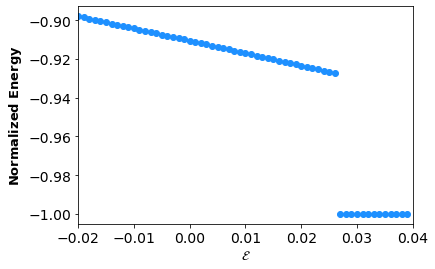

In [8]:
plt.figure(1)
plt.scatter(k, n4, color='dodgerblue')
plt.xlabel(r'$\mathbf{\mathcal{E}}$')
plt.ylabel(r'$\mathbf{Normalized ~Energy}$')
#plt.title(r'$Normalized~ Energy$ vs $\mathcal{E}$')
plt.xlim(ub,lb)
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


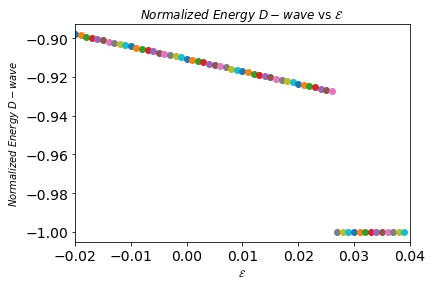

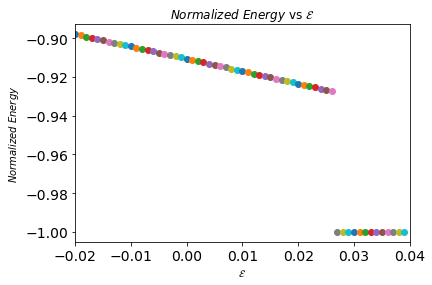

In [9]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())

Z=2
ub= -0.02
lb = 0.04

def objective(x,b):
    return (1/2)*((1/ x[0]**2)+ (1/ x[1]**2)) - Z*(1/ x[0]) - Z*(1/ x[1]) + (1/ math.sqrt(x[0]**2 + x[1]**2)) - (b*(x[0]) + b*(x[1]))


# initial guesses
i= 0.02
#j=1.2
n = 2
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0

# show initial objective
#print('Initial Objective: ' + str(objective(x0, i)))
#For j in np.arange(1.1,1.5, .1):

for i in np.arange(ub,lb, .001):
        
    solution1 = minimize(objective,x0, i, method="Nelder-Mead")
    seed = solution1.x
    
    solution = minimize(objective,seed, i, method="Nelder-Mead")
    x = solution.x
    
    #m= (x[1]-x[0])/x[1]
    
    h1 = (1/2)*(1/ x[0]**2) - (Z/ x[0])
    h2 =(1/2)* (1/ x[1]**2) - (Z/ x[1])
    #J =  (1/ math.sqrt(x[0]**2 + x[1]**2)) 
    J12=  (1/ math.sqrt(x[0]**2 + x[1]**2)) - (i*(x[0]) + i*(x[1]))
    energy = objective(x, i)
    #- (i*(x[0]) - i*(x[1]))
    #print(m)
    Norm = math.sqrt((h1)**2 + (h2)**2 + (J12)**2)
    norm_energy = (energy) / (Norm)
    m1 = h1 / (Norm)
    m2 = h2 / (Norm)
    m3 = J12 / (Norm)
    
    response = sampler.sample_ising({'a': m1, 'b': m2}, {('a', 'b'): m3})
    energydwave= response.data_vectors['energy'] 
    #print(energy)
    
    m5 = energydwave
    plt.figure(1)
    plt.scatter(i, m5)
    plt.xlabel(r'$\mathcal{E}$')
    plt.ylabel(r'$Normalized ~Energy ~D-wave$')
    plt.title(r'$Normalized~ Energy ~D-wave$ vs $\mathcal{E}$')
    plt.xlim(ub,lb)
    
    m4 = norm_energy
    plt.figure(2)
    plt.scatter(i, m4)
    plt.xlabel(r'$\mathcal{E}$')
    plt.ylabel(r'$Normalized ~Energy$')
    plt.title(r'$Normalized~ Energy$ vs $\mathcal{E}$')
    plt.xlim(ub,lb)
    
    #print(m1, m2, m3, i)
    
    #print(energydwave)
    
    

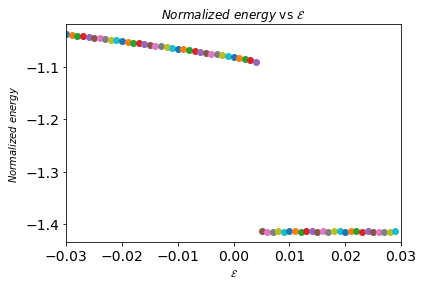

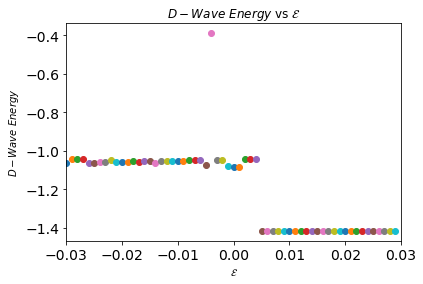

In [10]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())

Z=3

def KE(x):
    return (1/2)*((1/ x[0]**2) + (1/ x[1]**2) + (4/ x[2]**2))



def PE(x):
    return (Z*(1/ x[0]) + Z*(1/ x[1]) + Z*(1/ x[2]))

def IE(x):
    return (1/ math.sqrt(x[0]**2 + x[1]**2))+ (1/ math.sqrt(x[0]**2 + x[2]**2))+ (1/ math.sqrt(x[1]**2 + x[2]**2))

def EE(x,b):
    return -2*b*(x[0]+x[1] + x[2])

def objective(x,b):
    return KE(x) - PE(x) + IE(x) + EE(x, b)


# initial guesses
i= 0.02
#j=1.2
n = 3
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 3.0
x0[2] = 5.0

# show initial objective
#print('Initial Objective: ' + str(objective(x0, i)))
#For j in np.arange(1.1,1.5, .1):

ub= -0.03
lb = 0.03


for i in np.arange(ub,lb, .001):
        
    solution1 = minimize(objective,x0, i, method="Nelder-Mead")
    seed = solution1.x
    
    solution = minimize(objective,seed, i, method="Nelder-Mead")
    x = solution.x
    
    m= (x[1]-x[0])/x[1]
    
    h1 = (1/2)*(1/ x[0]**2) - (Z/ x[0])
    h2 = (1/2)*(1/ x[1]**2) - (Z/ x[1])
    h3 =(1/2)* (4/ x[2]**2) - (Z/ x[2]) 
    J12 =  (1/ math.sqrt(x[0]**2 + x[1]**2)) - (i*(x[0]) + i*(x[1]))
    J13 =  (1/ math.sqrt(x[0]**2 + x[2]**2)) - (i*(x[0]) + i*(x[2]))
    J23 =  (1/ math.sqrt(x[1]**2 + x[2]**2)) - (i*(x[1]) + i*(x[2]))
    energy = objective(x, i)
    #L=  (1/ math.sqrt(x[2]**2 + x[1]**2)) - (i*(x[1]) - i*(x[2]))
    #- (i*(x[0]) - i*(x[1]))
    #print(m)
    # show final objective
    #print('Final Objective: ' + str(objective(x, i)))
    #energy = objective(x, i)
    #- (i*(x[0]) - i*(x[1]))
    #print(m)
    Norm = math.sqrt((h1)**2 + (h2)**2+ (h3)**2 + (J12)**2 + (J13)**2 + (J23)**2)
    norm_energy = (energy) / (Norm)
    m1 = h1 / (Norm)
    m2 = h2 / (Norm)
    m3 = h3/(Norm)
    m4 = J12 / (Norm)
    m5 = J13 / (Norm)
    m6 = J23 / (Norm)
    
    response = sampler.sample_ising({'a': m1, 'b': m2, 'c': m3}, {('a', 'b'): m4, ('b', 'c'): m5, ('a', 'c'): m6})
    norm_energydwave= response.data_vectors['energy'] 
    #print(energy)

    
    m7 = norm_energy
    plt.figure(1)
    plt.scatter(i, m7)
    plt.xlabel(r'$\mathcal{E}$')
    plt.ylabel(r'$Normalized~energy$')
    plt.title(r'$Normalized~energy$ vs $\mathcal{E}$')
    plt.xlim(ub,lb)
    
    m8 = norm_energydwave
    plt.figure(2)
    plt.scatter(i, m8)
    plt.xlabel(r'$\mathcal{E}$')
    plt.ylabel(r'$D-Wave~Energy$')
    plt.title(r'$D-Wave ~ Energy$ vs $\mathcal{E}$')
    plt.xlim(ub,lb)
    
    #print(m1, m2, m3, m4, m5, m6, i)

In [11]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline

#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

def example_inline():
    plt.clf()

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())

Z=3

def KE(x):
    return (1/2)*((1/ x[0]**2) + (1/ x[1]**2) + (4/ x[2]**2))



def PE(x):
    return (Z*(1/ x[0]) + Z*(1/ x[1]) + Z*(1/ x[2]))

def IE(x):
    return (1/ math.sqrt(x[0]**2 + x[1]**2))+ (1/ math.sqrt(x[0]**2 + x[2]**2))+ (1/ math.sqrt(x[1]**2 + x[2]**2))

def EE(x,b):
    return -2*b*(x[0]+x[1] + x[2])

def objective(x,b):
    return KE(x) - PE(x) + IE(x) + EE(x, b)


# initial guesses
i= 0.02
#j=1.2
n = 3
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 3.0
x0[2] = 5.0

m7 = []
m8 = []
# show initial objective
#print('Initial Objective: ' + str(objective(x0, i)))
#For j in np.arange(1.1,1.5, .1):

ub= -0.03
lb = 0.03


for i in np.arange(ub,lb, .001):
        
    solution1 = minimize(objective,x0, i, method="Nelder-Mead")
    seed = solution1.x
    
    solution = minimize(objective,seed, i, method="Nelder-Mead")
    x = solution.x
    
    m= (x[1]-x[0])/x[1]
    
    h1 = (1/2)*(1/ x[0]**2) - (Z/ x[0])
    h2 = (1/2)*(1/ x[1]**2) - (Z/ x[1])
    h3 =(1/2)* (4/ x[2]**2) - (Z/ x[2]) 
    J12 =  (1/ math.sqrt(x[0]**2 + x[1]**2)) - (i*(x[0]) + i*(x[1]))
    J13 =  (1/ math.sqrt(x[0]**2 + x[2]**2)) - (i*(x[0]) + i*(x[2]))
    J23 =  (1/ math.sqrt(x[1]**2 + x[2]**2)) - (i*(x[1]) + i*(x[2]))
    energy = objective(x, i)
    #L=  (1/ math.sqrt(x[2]**2 + x[1]**2)) - (i*(x[1]) - i*(x[2]))
    #- (i*(x[0]) - i*(x[1]))
    #print(m)
    # show final objective
    #print('Final Objective: ' + str(objective(x, i)))
    #energy = objective(x, i)
    #- (i*(x[0]) - i*(x[1]))
    #print(m)
    Norm = math.sqrt((h1)**2 + (h2)**2+ (h3)**2 + (J12)**2 + (J13)**2 + (J23)**2)
    norm_energy = (energy) / (Norm)
    m1 = h1 / (Norm)
    m2 = h2 / (Norm)
    m3 = h3/(Norm)
    m4 = J12 / (Norm)
    m5 = J13 / (Norm)
    m6 = J23 / (Norm)
    
    response = sampler.sample_ising({'a': m1, 'b': m2, 'c': m3}, {('a', 'b'): m4, ('b', 'c'): m5, ('a', 'c'): m6})
    norm_energydwave= response.data_vectors['energy'] 
    #print(energy)

    m8.append(norm_energydwave)
    m7.append(norm_energy)
    

In [12]:
ub= -0.03
lb = 0.03
j= np.arange(ub,lb, .001)

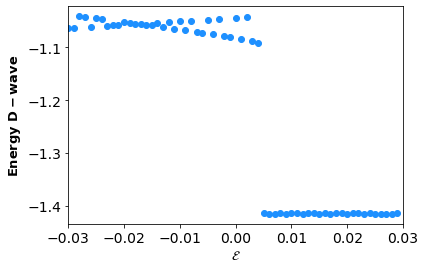

In [13]:
plt.figure(1)
plt.scatter(j, m8, color='dodgerblue')
plt.xlabel(r'$\mathbf{\mathcal{E}}$')
plt.ylabel(r'$\mathbf{Energy ~D-wave}$')
#plt.title(r'$Normalized~ Energy ~D-wave$ vs $\mathcal{E}$')
plt.xlim(ub,lb)
plt.show()
    
   

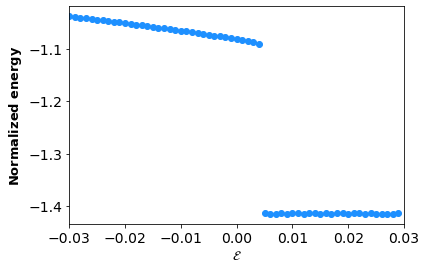

In [14]:
plt.figure(1)
plt.scatter(j, m7, color='dodgerblue')
plt.xlabel(r'$\mathbf{\mathcal{E}}$')
plt.ylabel(r'$\mathbf{Normalized~energy}$')
#plt.title(r'$Normalized~ Energy ~D-wave$ vs $\mathcal{E}$')
plt.xlim(ub,lb)
plt.show()

In [15]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
# Set Q for the problem QUBO
linear = {('x0', 'x0'): -1, ('x1', 'x1'): -1, ('x2', 'x2'): -1}
quadratic = {('x0', 'x1'): 2, ('x0', 'x2'): 2, ('x1', 'x2'): 2}
Q = dict(linear)
Q.update(quadratic)
# Minor-embed and sample 1000 times on a default D-Wave system
response = EmbeddingComposite(DWaveSampler()).sample_qubo(Q, num_reads=1000)
for sample, energy, num_occurrences in response.data():
    print(sample, "Energy: ", energy, "Occurrences: ", num_occurrences)



ValueError: too many values to unpack (expected 3)

In [ ]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline
#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())

Z=2

def KE(x):
    return (1/2)*((1/ x[0]**2) + (1/ x[1]**2))* (1/(math.sin(x[4])**2))

def PE1(x,a):
    return (Z*(1/ math.sqrt(x[0]**2 + (x[2]+a)**2))) + (Z*(1/ math.sqrt(x[0]**2 + (x[2]-a)**2)))

def PE2(x,a):
    return (Z*(1/ math.sqrt(x[1]**2 + (x[3]+a)**2))) + (Z*(1/ math.sqrt(x[1]**2 + (x[3]-a)**2)))

def IE(x):
    return 1/ math.sqrt((x[2]-x[3])**2 + x[0]**2 + x[1]**2 - 2*x[0]*x[1]*(math.cos(x[4])))


def objective(x,a):
    return KE(x) - PE1(x,a) - PE2(x,a) + IE(x)


# initial guesses
#i= 0.02
#j=1.2
n = 5
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 2.0
x0[2] = 3.0                                                       
x0[3] = 4.0
x0[4] = 5.0
                                                       
# show initial objective
#print('Initial Objective: ' + str(objective(x0, i)))
#For j in np.arange(1.1,1.5, .1):

ub= 0.0
lb = 5.0


for i in np.arange(ub,lb, 0.05):
        
    solution1 = minimize(objective,x0, i, method="Nelder-Mead")
    seed = solution1.x
    
    solution = minimize(objective,seed, i, method="Nelder-Mead")
    x = solution.x
    
    #m= (x[1]-x[0])/x[1]
    
    h1 = (1/2)*((1/ x[0]**2)* (1/(math.sin(x[4])**2))) - (Z*(1/ math.sqrt(x[0]**2 + (x[2]+i)**2))) - (Z*(1/ math.sqrt(x[0]**2 + (x[2]-i)**2)))
    #h1 = (1/2)*((1/ x[0]**2)* (1/(math.sin(x[4])**2)) - (Z*(1/ math.sqrt(x[0]**2 + (x[2]+i)**2))) + (Z*(1/ math.sqrt(x[0]**2 + (x[2]-a)**2)))
    h2 = (1/2)*((1/ x[1]**2)* (1/(math.sin(x[4])**2))) - (Z*(1/ math.sqrt(x[1]**2 + (x[3]+i)**2))) - (Z*(1/ math.sqrt(x[1]**2 + (x[3]-i)**2)))
    #h2 = (1/2)*((1/ x[0]**2)* (1/(math.sin(x[4])**2)) - (Z*(1/ math.sqrt(x[0]**2 + (x[2]+i)**2))) + (Z*(1/ math.sqrt(x[0]**2 + (x[2]-a)**2)))
                                              
    J12 =  1/ math.sqrt((x[2]-x[3])**2 + x[0]**2 + x[1]**2 - 2*x[0]*x[1]*(math.cos(x[4])))
    energy = objective(x, i)
    
    m1=h1
    m2=h2
    m3=J12
    
    response = sampler.sample_ising({'a': m1, 'b': m2}, {('a', 'b'): m3})
    energydwave= response.data_vectors['energy'] 

      
    plt.figure(1)
    plt.scatter(i, energydwave, color='dodgerblue')
    plt.xlabel(r'$\mathbf{a}$') 
    plt.ylabel(r'$\mathbf{Energy~ D-Wave}$')  
    
    
    plt.figure(2)
    plt.scatter(i, energy, color='dodgerblue')
    plt.xlabel(r'$\mathbf{a}$')
    plt.ylabel(r'$\mathbf{Energy}$')
    #plt.title(r'$h_{11}$ vs z')
    #plt.title(r'$critical ~ prameter$')
    

    
    

    
    #print(m1, m2, m3, m4, m5, m6, i)

In [ ]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline
#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())



def KE(x,a):
    return a*(a*(1/2)*((1/ x[0]**2)+ (1/ x[1]**2)))

def PE(x,a):
    return a*(a*(1/ x[0]) + a*(1/ x[1]))

def IE(x,a):
    return a*((1/ x[1])- ((x[0]**2)/ x[1])*(1/ (x[0]+x[1])**2) - ((x[0]**2)/(x[0]+x[1])**3))
    

def objective(x,a):
    return KE(x,a) - PE(x,a) + IE(x,a)
    #return (1/2)*((1/ x[0]**2)+ (1/ x[1]**2)) - (a*(1/ x[0]) + a*(1/ x[1])) + (1/ math.sqrt(x[0]**2 + x[1]**2))
    
    
# initial guesses
#i=1.2
n = 2
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 2.0

# show initial objective
#print('Initial Objective: ' + str(objective(x0, i)))
for i in np.arange(1, 20, 1):
    solution1 = minimize(objective,x0, i, method="Nelder-Mead")
    seed = solution1.x
    
    solution = minimize(objective,seed, i, method="Nelder-Mead")
    x = solution.x
    
    h1 = i*(i*(1/2)*(1/ x[0]**2) - i*(1/ x[0]))
    h2 = i*(i*(1/2)*(1/ x[1]**2) - i*(1/ x[1]))
    J12 =  i*((1/ x[1])- ((x[0]**2)/ x[1])*(1/ (x[0]+x[1])**2) - ((x[0]**2)/(x[0]+x[1])**3))
    energy= objective(x, i)
    
    m1=h1
    m2=h2
    m3=J12

    response = sampler.sample_ising({'a': m1, 'b': m2}, {('a', 'b'): m3})
    energydwave= response.data_vectors['energy'] 

      
    plt.figure(1)
    plt.scatter(i, energydwave, color='dodgerblue')
    plt.xlabel(r'$\mathbf{Z}$')
    plt.ylabel(r'$\mathbf{Energy~ D-Wave}$')  
    
    
    plt.figure(2)
    plt.scatter(i, energy, color='dodgerblue')
    plt.xlabel(r'$\mathbf{Z}$')
    plt.ylabel(r'$\mathbf{Energy}$')
    

    
